# Day 1
The newly-improved calibration document consists of lines of text; each line originally contained a specific calibration value that the Elves now need to recover. On each line, the calibration value can be found by combining the first digit and the last digit (in that order) to form a single two-digit number.

For example:
```
1abc2
pqr3stu8vwx
a1b2c3d4e5f
treb7uchet
```
In this example, the calibration values of these four lines are 12, 38, 15, and 77. Adding these together produces 142.

Consider your entire calibration document. What is the sum of all of the calibration values?

In [10]:
import re

In [ ]:
file_path = '../data/day1.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

len(lines)

## Part 1

In [26]:
def remove_non_digits(s: str):
    return re.sub(r'\D', '', s)

def extract_digits(s: str):
    # no empty lines according to the description
    if len(s) == 1:
        s = s*2
    else:
        s = s[0] + s[-1]
    return int(s)

In [31]:
res = sum([extract_digits(remove_non_digits(s)) for s in lines])
res

54159

## Part 2

In [77]:
from typing import List

In [109]:
def find_overlapping_matches(pattern, text):
    # Use a lookahead assertion to find overlapping matches
    return [match.group(1) for match in re.finditer(f'(?=({pattern}))', text)]

def extract_allowed_values(original_string, allowed_values):
    # concat literal strings
    pattern = '|'.join(re.escape(value) for value in allowed_values)
    pattern += r'|\d'
    # return re.findall(pattern, original_string)
    return find_overlapping_matches(pattern, original_string)

In [112]:
def convert_spelled(l: List[str], mapping):
    spelled = list(map(lambda x: mapping[x] if x in mapping else x, l))
    return spelled

In [113]:
def extract_first_last(s: List[str]):
    # no empty lines according to the description
    if len(s) == 1:
        s = s[0]*2
    else:
        s = s[0] + s[-1]
    return int(s)

In [114]:
def extract_calibration_value(s, mapping):
    allowed_values = extract_allowed_values(s, mapping.keys())
    digits = convert_spelled(allowed_values, mapping)
    calibration_value = extract_first_last(digits)
    return calibration_value

In [115]:
for s in lines:
    print(s)
    print(extract_calibration_value(s, spelled_digits_mapping))

eightqrssm9httwogqshfxninepnfrppfzhsc
89
one111jxlmc7tvklrmhdpsix
16
bptwone4sixzzppg
26
ninezfzseveneight5kjrjvtfjqt5nineone
91
58kk
58
5b32
52
1dtwo
12
six7two7sixtwo78
68
mvhsixpptztjh13sixthree2
62
six1bqqvrxndt
61
fourmk5grmqone944nbvtj
44
twofiveqxfivezpkvfvxt5eightjhnpl
28
fpfqp7three7
77
scmlf76ninegjzjkj97two
72
fivetkhfnnx22
52
sevenxvbcbsvxr7eighttwo
72
1hvhqqmrs1bgttshthg6
16
4bvnccbdh4onefztdrpq62vvbnvpxxvgrngnfjgfk
42
653spgrvd
63
sixctlhkjmmxh2fourfivenine37
67
229mjp3txmqsxxqdbnnnbrtrcctgzseven
27
jfourdbpcjc39bhglgnine
49
bvnltxdmsp7twoxzpdjdvkxeight4twothree
73
jlvcdrkhzh8seven3
83
418oneeight
48
53flcrlvqdeight84frmdcsixchcbc
56
114sixone1eight2
12
xrbtzbklqsl11
11
bhfhszrhzgrhsfd2threeseventwosevenoneseven
27
four9one
41
5p
55
twovhjpdxmcxshnhv5vs
25
qkkqeightcxcltnn7one9pmhlmvsxnine
89
4cbptmvp1
41
84xgm
84
bzsmqhkrdtdmhhjgrjsdfour1ninetwo61
41
onetwoeightgflhlgksevennine7two6
16
mbjhkhfour6
46
8cvqk6eightonethree1
81
qhbllbnlkr3rcsmjvztgd
33
18eight4
14
hhc6onegvk

In [116]:
spelled_digits_mapping = {'one': '1', 'two': '2', 'three': '3', 'four': '4', 'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9'}

res = sum([extract_calibration_value(s, spelled_digits_mapping) for s in lines])
res

53866

In [97]:
test = ['two1nine', 'eightwothree', 'abcone2threexyz', 'xtwone3four', '4nineeightseven2', 'zoneight234', '7pqrstsixteen']
[extract_calibration_value(s, spelled_digits_mapping) for s in test]
sum([extract_calibration_value(s, spelled_digits_mapping) for s in test])

281

# Day 2

## Part 1
You play several games and record the information from each game (your puzzle input). Each game is listed with its ID number (like the 11 in Game 11: ...) followed by a semicolon-separated list of subsets of cubes that were revealed from the bag (like 3 red, 5 green, 4 blue).

For example, the record of a few games might look like this:
```
Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green
Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue
Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red
Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red
Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green
```
In game 1, three sets of cubes are revealed from the bag (and then put back again). The first set is 3 blue cubes and 4 red cubes; the second set is 1 red cube, 2 green cubes, and 6 blue cubes; the third set is only 2 green cubes.

The Elf would first like to know which games would have been possible if the bag contained only 12 red cubes, 13 green cubes, and 14 blue cubes?

In the example above, games 1, 2, and 5 would have been possible if the bag had been loaded with that configuration. However, game 3 would have been impossible because at one point the Elf showed you 20 red cubes at once; similarly, game 4 would also have been impossible because the Elf showed you 15 blue cubes at once. If you add up the IDs of the games that would have been possible, you get 8.

Determine which games would have been possible if the bag had been loaded with only 12 red cubes, 13 green cubes, and 14 blue cubes. What is the sum of the IDs of those games?

In [1]:
load = {'red': 12, 'green': 13, 'blue': 14}

file_path = '../data/day2.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

len(lines)

100

In [9]:
l = lines[50]
l

'Game 51: 4 red, 18 green, 1 blue; 15 green; 3 blue, 16 red, 17 green; 9 blue, 10 red, 13 green; 11 green, 14 red; 1 green, 7 blue, 1 red'

In [41]:
def parse_line(l):
    s_without_game = l.split("Game ")[1]
    game_id, sets_str = s_without_game.split(': ')
    return int(game_id), sets_str.split('; ')

parse_line(lines[50])

(51,
 ['4 red, 18 green, 1 blue',
  '15 green',
  '3 blue, 16 red, 17 green',
  '9 blue, 10 red, 13 green',
  '11 green, 14 red',
  '1 green, 7 blue, 1 red'])

In [45]:
import re
pattern = r"(\d+)\s(" + "|".join(load.keys()) + ")"

def set2dict(input):
    matches = re.findall(pattern, input)
    return {k: int(v) for v, k in matches}

set2dict(sets[1])

{'red': 9, 'green': 6, 'blue': 4}

In [46]:
def check_correct(input, bag):
    for k, v in input.items():
        if bag[k] < v:
            return False
    return True

def check_game(sets, load):
    for s in sets:
        set_dict = set2dict(s)
        if not check_correct(set_dict, load):
            return False
    return True

In [47]:
sum = 0
for l in lines:
    game_id, sets = parse_line(l)
    if check_game(sets, load):
        sum += game_id

In [48]:
sum

2600

## Part 2

The Elf says they've stopped producing snow because they aren't getting any water! He isn't sure why the water stopped; however, he can show you how to get to the water source to check it out for yourself. It's just up ahead!

As you continue your walk, the Elf poses a second question: in each game you played, what is the fewest number of cubes of each color that could have been in the bag to make the game possible?

Again consider the example games from earlier:
```
Game 1: 3 blue, 4 red; 1 red, 2 green, 6 blue; 2 green
Game 2: 1 blue, 2 green; 3 green, 4 blue, 1 red; 1 green, 1 blue
Game 3: 8 green, 6 blue, 20 red; 5 blue, 4 red, 13 green; 5 green, 1 red
Game 4: 1 green, 3 red, 6 blue; 3 green, 6 red; 3 green, 15 blue, 14 red
Game 5: 6 red, 1 blue, 3 green; 2 blue, 1 red, 2 green
```

* In game 1, the game could have been played with as few as 4 red, 2 green, and 6 blue cubes. If any color had even one fewer cube, the game would have been impossible.
* Game 2 could have been played with a minimum of 1 red, 3 green, and 4 blue cubes.
* Game 3 must have been played with at least 20 red, 13 green, and 6 blue cubes.
* Game 4 required at least 14 red, 3 green, and 15 blue cubes.
* Game 5 needed no fewer than 6 red, 3 green, and 2 blue cubes in the bag.

The power of a set of cubes is equal to the numbers of red, green, and blue cubes multiplied together. The power of the minimum set of cubes in game 1 is 48. In games 2-5 it was 12, 1560, 630, and 36, respectively. Adding up these five powers produces the sum 2286.

For each game, find the minimum set of cubes that must have been present. What is the sum of the power of these sets?

In [49]:
from collections import defaultdict
from itertools import chain

In [54]:
def calculate_set_power(sets):
    set_dicts = [set2dict(s) for s in sets]
    combined_dict = defaultdict(list)

    # Chaining all key-value pairs from all dictionaries and accumulating values
    for key, value in chain(*[d.items() for d in set_dicts]):
        combined_dict[key].append(value)

    # Converting back to a regular dictionary for final output (optional)
    combined_dict = dict(combined_dict)
    power = 1
    for v in combined_dict.values():
        power *= max(v)
    return power

In [56]:
sum = 0
for l in lines:
    game_id, sets = parse_line(l)
    power = calculate_set_power(sets)
    sum += power
sum

86036

# Day 3

## Part 1

The engineer explains that an engine part seems to be missing from the engine, but nobody can figure out which one. If you can add up all the part numbers in the engine schematic, it should be easy to work out which part is missing.

The engine schematic (your puzzle input) consists of a visual representation of the engine. There are lots of numbers and symbols you don't really understand, but apparently any number adjacent to a symbol, even diagonally, is a "part number" and should be included in your sum. (Periods (.) do not count as a symbol.)

Here is an example engine schematic:
```
467..114..
...*......
..35..633.
......#...
617*......
.....+.58.
..592.....
......755.
...$.*....
.664.598..
```
In this schematic, two numbers are not part numbers because they are not adjacent to a symbol: 114 (top right) and 58 (middle right). Every other number is adjacent to a symbol and so is a part number; their sum is 4361.

Of course, the actual engine schematic is much larger. What is the sum of all of the part numbers in the engine schematic?

In [2]:
file_path = '../data/day3.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

len(lines), len(lines[0])

(140, 140)

everything apart from digits and dots are symbols

conditions:
1. first digit after a symbol
2. last digit before a symbol
3. above and below lines have any symbol between (inclusively) first digit index - 1 and last digit index + 1

the first two rules can be checked in one run over the line (if I do not solve this with regex). the second is a function call for check if any

In [3]:
import re

def contains_only_digits_and_dots(s):
    return re.search("[^\d.]", s) is None

contains_only_digits_and_dots('3#')

False

In [4]:
contains_only_digits_and_dots('3')

True

In [5]:
def yield_integer_sequences(s):
    # both indices are on the exact positions
    pattern = r'\d+'
    for match in re.finditer(pattern, s):
        yield (match.start(), match.end()-1, match.group())

string = '.855.442.'
for start, end, value in yield_integer_sequences(string):
    print(f"Integer sequence from index {start} to {end}: {string[start:end+1]} (string) or {value} (value)")

Integer sequence from index 1 to 3: 855 (string) or 855 (value)
Integer sequence from index 5 to 7: 442 (string) or 442 (value)


In [6]:
contains_only_digits_and_dots(lines[0][0])

True

In [7]:
total_lines = len(lines)
total_lines

140

In [8]:
def other_line_contains_any_symbol(l, start, end):
    # start, end - original line indixes
    line_len = len(l)
    if start > 0:
        start -= 1
    if end < (line_len - 1):
        end += 1
    # print(f"checking sequence '{l[start:end+1]}'")
    res = not contains_only_digits_and_dots(l[start:end+1])
    # if res:
    #     print(f"this context works: '{l[start:end+1]}'")
    return res

# original                      ..11
other_line_contains_any_symbol('...*', 2, 3)

True

In [9]:
def check_line_with_context(l, prev_line, next_line):
    part_numbers = []
    for start, end, value in yield_integer_sequences(l):
        line_len = len(l)
        if start != 0 and not contains_only_digits_and_dots(l[start - 1]):
            part_numbers.append(int(value))
            continue
        if end != (line_len - 1) and not contains_only_digits_and_dots(l[end + 1]):
            part_numbers.append(int(value))
            continue
        if prev_line and other_line_contains_any_symbol(prev_line, start, end):
            part_numbers.append(int(value))
            continue
        if next_line and other_line_contains_any_symbol(next_line, start, end):
            part_numbers.append(int(value))
            continue

    return part_numbers
            
check_line_with_context(lines[1], None, None)

[577, 465, 169]

In [10]:
check_line_with_context(l=lines[1], prev_line=lines[0], next_line=lines[2])

[21, 971, 577, 316, 465, 169]

In [13]:
total = 0
for line_number, l in enumerate(lines):
    if line_number > 0:
        prev_line = lines[line_number - 1]
    else:
        prev_line = None
    if line_number < total_lines - 1:
        next_line = lines[line_number + 1]
    else:
        next_line = None
    
    matched_numbers = check_line_with_context(l=l, prev_line=prev_line, next_line=next_line)
    print('line_number', line_number, 'matched_numbers:', matched_numbers, 'sum:', sum(matched_numbers))
    total += sum(matched_numbers)
        
total  

line_number 0 matched_numbers: [190, 520] sum: 710
line_number 1 matched_numbers: [21, 971, 577, 316, 465, 169] sum: 2519
line_number 2 matched_numbers: [881, 635, 577, 864, 873, 742, 714, 244] sum: 5530
line_number 3 matched_numbers: [602, 423, 939, 906, 899, 965, 309] sum: 5043
line_number 4 matched_numbers: [737, 294, 321, 337, 305, 153, 130, 638] sum: 2915
line_number 5 matched_numbers: [821, 544, 282, 165, 836, 112] sum: 2760
line_number 6 matched_numbers: [456, 281, 847, 448, 728, 833] sum: 3593
line_number 7 matched_numbers: [830, 34, 911, 702, 21, 279, 226] sum: 3003
line_number 8 matched_numbers: [192, 247, 40, 504] sum: 983
line_number 9 matched_numbers: [304, 938, 258, 679, 702, 742, 656, 645, 916, 263] sum: 6103
line_number 10 matched_numbers: [841, 168, 633, 758, 993, 410, 920, 195, 492] sum: 5410
line_number 11 matched_numbers: [988, 689, 554, 245, 794] sum: 3270
line_number 12 matched_numbers: [489, 866, 354, 567, 949, 969, 913, 10] sum: 5117
line_number 13 matched_numbe

531932

## Part 2

The missing part wasn't the only issue - one of the gears in the engine is wrong. A gear is any * symbol that is adjacent to exactly two part numbers. Its gear ratio is the result of multiplying those two numbers together.

This time, you need to find the gear ratio of every gear and add them all up so that the engineer can figure out which gear needs to be replaced.

Consider the same engine schematic again:
```
467..114..
...*......
..35..633.
......#...
617*......
.....+.58.
..592.....
......755.
...$.*....
.664.598..
```
In this schematic, there are two gears. The first is in the top left; it has part numbers 467 and 35, so its gear ratio is 16345. The second gear is in the lower right; its gear ratio is 451490. (The * adjacent to 617 is not a gear because it is only adjacent to one part number.) Adding up all of the gear ratios produces 467835.

What is the sum of all of the gear ratios in your engine schematic?

There may be a nice solution if we had a dict of gear locations where elements are all adjacent part numbers. The solution based on the 1st part (based on numbers) will contain crazy conditions. 

So we base the solution on the gear and search for the adjacent part numbers.

1. The current line and neighbouring are considered
2. Asterisk is found. Store index to dict (line, line_index)
3. In-line adjacency check. Add to dict values list
4. Other line (both: top and bot) may have 1\2 diagonal neighbours or only 1 intersecting straght the same index
    * if index above\below the asterisk is a digit, find it's borders (both sides) and store to the dict values list. break
    * elif 
        * index above\below -1 is a digit, find it's border to the left and store to the dict values list. DON'T BREAK
        * index above\below +1 is a digit, find it's border to the right and store to the dict value list.

In [61]:
def find_number(l, idx, direction) -> str:
    if direction == 0:
        current_symbol = l[idx]
        if current_symbol.isdigit():  # there is a number crossing this idx
            return find_number(l=l, idx=idx, direction=-1) + current_symbol + find_number(l=l, idx=idx, direction=1)
    
    elif direction == -1:
        if idx <= 0:
            return ''
        
        left_symbol = l[idx-1]
        if left_symbol.isdigit():
            return find_number(l, idx-1, direction=direction) + left_symbol
        else:
            return ''
    
    elif direction == 1:
        if idx >= len(l) - 1:
            return ''
        
        right_symbol = l[idx+1]
        if right_symbol.isdigit():
            return right_symbol + find_number(l, idx+1, direction=direction)
        else:
            return ''

find_number('.....621.3', 3, 0)

In [62]:
def find_in_line(l, idx):
    left_in_line = find_number(l=l, idx=idx, direction=-1)
    right_in_line = find_number(l=l, idx=idx, direction=1)
    res = []
    if left_in_line: res.append(left_in_line)
    if right_in_line: res.append(right_in_line)
    return res

def find_in_other_line(l, idx):
    non_diag_number = find_number(l=l, idx=idx, direction=0)
    if non_diag_number:
        return [non_diag_number]
    else:
        return find_in_line(l=l, idx=idx)

In [63]:
def find_gears(l, prev_line, next_line, line_number, gears_dict):
    for idx, el in enumerate(l):
        if el == '*':
            gears_dict[(line_number, idx)] = []
            gears_dict[(line_number, idx)] += find_in_line(l, idx)
            if prev_line:
                gears_dict[(line_number, idx)] += find_in_other_line(l=prev_line, idx=idx)
            if next_line:
                gears_dict[(line_number, idx)] += find_in_other_line(l=next_line, idx=idx)
            
    return gears_dict

find_gears(lines[1], lines[0], lines[2], 1, {})

{(1, 72): ['520', '864'], (1, 119): ['465', '169']}

In [65]:
gears_dict = {}
for line_number, l in enumerate(lines):
    if line_number > 0:
        prev_line = lines[line_number - 1]
    else:
        prev_line = None
    if line_number < total_lines - 1:
        next_line = lines[line_number + 1]
    else:
        next_line = None
    
    gears_dict = find_gears(l=l, prev_line=prev_line, next_line=next_line, line_number=line_number, gears_dict=gears_dict)

In [70]:
lengths = [len(v) for v in gears_dict.values()]
min(lengths), max(lengths)

(1, 2)

thanks god, there are no cases with 3-member gears

In [73]:
total = 0
for k, v in gears_dict.items():
    if len(v) == 2:
        # print(k, v)
        total += int(v[0]) * int(v[1])

total

73646890

# Day 4

## Part 1
The Elf leads you over to the pile of colorful cards. There, you discover dozens of scratchcards, all with their opaque covering already scratched off. Picking one up, it looks like each card has two lists of numbers separated by a vertical bar (|): a list of winning numbers and then a list of numbers you have. You organize the information into a table (your puzzle input).

As far as the Elf has been able to figure out, you have to figure out which of the numbers you have appear in the list of winning numbers. The first match makes the card worth one point and each match after the first doubles the point value of that card.

For example:
```
Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11
```
In the above example, card 1 has five winning numbers (41, 48, 83, 86, and 17) and eight numbers you have (83, 86, 6, 31, 17, 9, 48, and 53). Of the numbers you have, four of them (48, 83, 17, and 86) are winning numbers! That means card 1 is worth 8 points (1 for the first match, then doubled three times for each of the three matches after the first).

Card 2 has two winning numbers (32 and 61), so it is worth 2 points.
Card 3 has two winning numbers (1 and 21), so it is worth 2 points.
Card 4 has one winning number (84), so it is worth 1 point.
Card 5 has no winning numbers, so it is worth no points.
Card 6 has no winning numbers, so it is worth no points.
So, in this example, the Elf's pile of scratchcards is worth 13 points.

Take a seat in the large pile of colorful cards. How many points are they worth in total?

In [52]:
file_path = '../data/day4.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

len(lines), len(lines[0])

(190, 116)

In [16]:
def extract_lists(s):
    try:
        two_strings = s.split(':')[1].split(' | ')
    except:
        print(s)
    res = []
    for s in two_strings:
        res.append([int(el.strip()) for el in s.split(' ') if el.strip() != ''])
    return res

extract_lists(lines[0])

[[2, 15, 17, 11, 64, 59, 45, 41, 61, 19],
 [4,
  36,
  62,
  43,
  94,
  41,
  24,
  25,
  13,
  83,
  97,
  86,
  61,
  90,
  67,
  7,
  15,
  58,
  18,
  19,
  38,
  17,
  49,
  52,
  37]]

In [19]:
total = 0
for l in lines:
    winning, given = extract_lists(l)
    points = 0
    # print(l)
    for el in given:
        if el in winning:
            if points == 0:
                points = 1
            else:
                points *= 2
            # print(el)
    total += points
total

15205

## Part 2
Just as you're about to report your findings to the Elf, one of you realizes that the rules have actually been printed on the back of every card this whole time.

There's no such thing as "points". Instead, scratchcards only cause you to win more scratchcards equal to the number of winning numbers you have.

Specifically, you win copies of the scratchcards below the winning card equal to the number of matches. So, if card 10 were to have 5 matching numbers, you would win one copy each of cards 11, 12, 13, 14, and 15.

Copies of scratchcards are scored like normal scratchcards and have the same card number as the card they copied. So, if you win a copy of card 10 and it has 5 matching numbers, it would then win a copy of the same cards that the original card 10 won: cards 11, 12, 13, 14, and 15. This process repeats until none of the copies cause you to win any more cards. (Cards will never make you copy a card past the end of the table.)

This time, the above example goes differently:
```
Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11
```

Card 1 has four matching numbers, so you win one copy each of the next four cards: cards 2, 3, 4, and 5.  
Your original card 2 has two matching numbers, so you win one copy each of cards 3 and 4.  
Your copy of card 2 also wins one copy each of cards 3 and 4.  
Your four instances of card 3 (one original and three copies) have two matching numbers, so you win four copies each of cards 4 and 5.   
Your eight instances of card 4 (one original and seven copies) have one matching number, so you win eight copies of card 5.  
Your fourteen instances of card 5 (one original and thirteen copies) have no matching numbers and win no more cards.  
Your one instance of card 6 (one original) has no matching numbers and wins no more cards.  
Once all of the originals and copies have been processed, you end up with 1 instance of card 1, 2 instances of card 2, 4 instances of card 3, 8 instances of card 4, 14 instances of card 5, and 1 instance of card 6. In total, this example pile of scratchcards causes you to ultimately have 30 scratchcards!  

Process all of the original and copied scratchcards until no more scratchcards are won. Including the original set of scratchcards, how many total scratchcards do you end up with?

In [32]:
def parse(s):
    try:
        card, values = s.split(':')
        two_strings = values.split(' | ')
    except:
        print(s)
    res = []
    for s in two_strings:
        res.append([int(el.strip()) for el in s.split(' ') if el.strip() != ''])

    card = int(card.split(' ')[-1].strip())
    return [card] + res

parse(lines[0])

[1,
 [2, 15, 17, 11, 64, 59, 45, 41, 61, 19],
 [4,
  36,
  62,
  43,
  94,
  41,
  24,
  25,
  13,
  83,
  97,
  86,
  61,
  90,
  67,
  7,
  15,
  58,
  18,
  19,
  38,
  17,
  49,
  52,
  37]]

In [54]:
from collections import deque

card_prize = {}
queue = deque(range(1, len(lines) + 1))
processed = 0

while queue:
    human_idx = queue.popleft()
    s = lines[human_idx-1]
    card_n, winning, given = parse(s)
    # print('processing card number', card_n)
    processed += 1
    
    if card_n in card_prize:
        matches = card_prize[card_n]
        # print('found card number', card_n, f"with {matches} matches") 
        for i in range(1, matches+1):
            queue.append(card_n+i)
            # print(f"Adding card {card_n+i} to queue") 
    else:
        matches = 0
        for el in given:
            if el in winning:
                matches += 1
                queue.append(card_n+matches)
                # print(f"Adding card {card_n+matches} to queue") 
        card_prize[card_n] = matches
    
processed

6189740

https://www.instagram.com/reel/CvDZ7nSrjCQ/?igshid=MzRlODBiNWFlZA%3D%3D

# Day 5

## Part 1

In [48]:
file_path = '../data/day5.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

# lines = """seeds: 79 14 55 13

# seed-to-soil map:
# 50 98 2
# 52 50 48

# soil-to-fertilizer map:
# 0 15 37
# 37 52 2
# 39 0 15

# fertilizer-to-water map:
# 49 53 8
# 0 11 42
# 42 0 7
# 57 7 4

# water-to-light map:
# 88 18 7
# 18 25 70

# light-to-temperature map:
# 45 77 23
# 81 45 19
# 68 64 13

# temperature-to-humidity map:
# 0 69 1
# 1 0 69

# humidity-to-location map:
# 60 56 37
# 56 93 4
# """
# lines = lines.split('\n')


# len(lines)

In [49]:
def get_seeds(lines):
    l = lines[0]
    seeds = l.split(': ')[-1]
    seeds = seeds.split(' ')
    return [int(s) for s in seeds]

seeds = get_seeds(lines)
seeds

[3082872446,
 316680412,
 2769223903,
 74043323,
 4131958457,
 99539464,
 109726392,
 353536902,
 619902767,
 648714498,
 3762874676,
 148318192,
 1545670780,
 343889780,
 4259893555,
 6139816,
 3980757676,
 20172062,
 2199623551,
 196958359]

In [50]:
mapping_names = ['seed-to-soil', 'soil-to-fertilizer', 'fertilizer-to-water', 'water-to-light',
                 'light-to-temperature', 'temperature-to-humidity', 'humidity-to-location']
mappings = {k: [] for k in mapping_names}

name_idx = -1
for l in lines[2:]:
    if l == '':
        continue
    
    if name_idx < len(mapping_names) - 1 and mapping_names[name_idx+1] in l:
        print('new section', l)
        name_idx += 1
        continue
    mappings[mapping_names[name_idx]].append([int(el) for el in l.split(' ')])

new section seed-to-soil map:
new section soil-to-fertilizer map:
new section fertilizer-to-water map:
new section water-to-light map:
new section light-to-temperature map:
new section temperature-to-humidity map:
new section humidity-to-location map:


In [51]:
mappings

{'seed-to-soil': [[2211745924, 1281207339, 39747980],
  [3648083739, 2564129012, 145170114],
  [4171944574, 2333022880, 44675857],
  [540694760, 848661020, 78793182],
  [256996824, 588160543, 260500477],
  [1870557289, 1804847051, 174857657],
  [3877597859, 2853012070, 228980636],
  [1634159465, 2150723562, 100770342],
  [3793253853, 2293912908, 39109972],
  [652571990, 567856215, 20304328],
  [2480343183, 3372556760, 130573730],
  [1831144195, 528443121, 39413094],
  [0, 1690920197, 113926854],
  [3145720856, 3081992706, 290564054],
  [624623106, 1979704708, 27948884],
  [3844601856, 3751059243, 32996003],
  [1260492360, 1175075910, 106131429],
  [1366623789, 166330978, 138490835],
  [1175000149, 927454202, 85492211],
  [696570061, 1596389312, 94530885],
  [2647046837, 3784055246, 498674019],
  [4216620431, 2709299126, 78346865],
  [953230443, 1450000160, 146389152],
  [791100946, 1012946413, 162129497],
  [1734929807, 427093569, 96214388],
  [672876318, 403399826, 23693743],
  [11392

if input is within range 'source range start' -> 'source range start' + 'range length', apply mapping. Otherwise return input

In [ ]:
def map_almanac(input, mapping_values: list):
    for destination_range_start, source_range_start, range_length in mapping_values:
        mapping_range = [source_range_start, source_range_start + range_length - 1]
        if mapping_range[0] <= input <= mapping_range[1]:
            return input + (destination_range_start - source_range_start)
    return input
        
for i in range(100):
    print(i, map_almanac(i, mappings['seed-to-soil']))

In [28]:
from tqdm.notebook import tqdm

tqdm.pandas()

In [15]:
results = []
for input in tqdm(seeds, total=len(seeds)):
    # print('seed', input)
    for step in tqdm(mapping_names, total=len(mapping_names)):
        input = map_almanac(input, mappings[step])
        # print(step, input)
    results.append(input)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
results

[1085436433,
 84470622,
 797022648,
 3040934752,
 2473940599,
 3066430893,
 3076617821,
 2837833773,
 4058019656,
 2450588295,
 3210752671,
 1175734550,
 2761597611,
 2828186651,
 1061720983,
 1611747764,
 136887475,
 1625780010,
 970058274,
 4099273491]

In [18]:
min(results)

84470622

## Part 2

The worst thing you can do is to iterate over the solution in part 1. 

Alternatively, we can check intersections of input and mapping ranges until the whole input is mapped. Importantly, output has to be sorted to keep this mapping going. If mapping has interruptions, it has to be split into sorted pieces. Or just pieces of shape [start, len]. There may be a separate func for this output prettification. Do we need to process them somehow in an organised way? Looks like not. Just pass each [start, len] range to the next step. All the results from the last step (doesn't mean which path produced it) is a location to consider

In [53]:
def map_almanac(input_ranges: List[List[int]], mapping_values: List) -> List[List[int]]:
    res = []
    current_input_ranges = input_ranges
    next_input_ranges = []

    for i, (destination_range_start, source_range_start, range_length) in enumerate(mapping_values):
        mapping_range = [source_range_start, source_range_start + range_length - 1]
        
        # print(i, 'mapping_range', mapping_range, 'current_input_ranges', current_input_ranges)

        for input_range in current_input_ranges:  # all the ranges from the previous step have to be processed
            # input_range = input_ranges.popleft()
            # print('input_range', input_range)
            input_start = input_range[0]
            input_end = input_range[0] + input_range[1] - 1
        
            intersection_start = max(input_start, mapping_range[0])
            intersection_end = min(input_end, mapping_range[1])
            
            if intersection_start <= intersection_end:
                shift = destination_range_start - source_range_start
                # print('have instersection. appending to res', [intersection_start + shift, intersection_end - intersection_start + 1])
                res.append([intersection_start + shift, intersection_end - intersection_start + 1])
                # add remaining pieces of start, len to the next round of input_ranges
                if input_start < intersection_start:
                    # print('have left remainder. appending to input_ranges', [input_start, intersection_start - input_start + 1])
                    next_input_ranges.append([input_start, intersection_start - input_start + 1])
                if input_end > intersection_end:
                    # print('have right remainder. appending to input_ranges', [intersection_end, input_end - intersection_end + 1])
                    next_input_ranges.append([intersection_end, input_end - intersection_end + 1])
            else:
                if i == (len(mapping_values) - 1):  # there are no mappings remaining. just mapping 1-2-1
                    # print('no intersection. last stage. appending to res', input_range)
                    res.append(input_range)
                else:
                    # print('no intersection. not last stage. appending to next_input_ranges', input_range)
                    next_input_ranges.append(input_range)

        current_input_ranges = next_input_ranges
        next_input_ranges = []
    return res
        
map_almanac([[79, 14], [55, 13]], mappings['seed-to-soil'])

[[2045415025, 14], [2045415001, 13]]

In [54]:
def extract_pairs(lst):
    pairs = []
    for i in range(0, len(lst), 2):
        # Append the pair to the result list
        # Use slicing to handle cases where the list has an odd number of elements
        pairs.append(lst[i:i+2])
    return pairs

extract_pairs(seeds)

[[3082872446, 316680412],
 [2769223903, 74043323],
 [4131958457, 99539464],
 [109726392, 353536902],
 [619902767, 648714498],
 [3762874676, 148318192],
 [1545670780, 343889780],
 [4259893555, 6139816],
 [3980757676, 20172062],
 [2199623551, 196958359]]

In [55]:
results = []
input = extract_pairs(seeds)
for step in tqdm(mapping_names, total=len(mapping_names)):
    print('\n\n\nstep', step)
    print('input', input, '\n')
    input = map_almanac(input, mappings[step])
    # print(step, input)
    results.append(input)

  0%|          | 0/7 [00:00<?, ?it/s]




step seed-to-soil
input [[3082872446, 316680412], [2769223903, 74043323], [4131958457, 99539464], [109726392, 353536902], [619902767, 648714498], [3762874676, 148318192], [1545670780, 343889780], [4259893555, 6139816], [3980757676, 20172062], [2199623551, 196958359]] 




step soil-to-fertilizer
input [[4171944574, 44675857], [540694760, 78793182], [288739048, 228758253], [1870557289, 84713509], [1683059454, 51870353], [3793253853, 39109972], [2480343183, 26996098], [0, 113926854], [3146600596, 289684314], [3856417289, 21180570], [1260492360, 93541355], [1366623789, 138490835], [1175000149, 85492211], [696570061, 94530885], [2994950048, 99539464], [2647046837, 127137622], [3122885146, 6139816], [2843749267, 20172062], [4276545208, 18422088], [1048901063, 50718532], [791100946, 162129497], [1734929807, 36169725], [672876318, 23693743], [2155141338, 56604586], [1099619595, 75380554], [517497301, 23197459], [2293912908, 18883173], [3372556759, 2], [4106578495, 55621235], [166330977, 2]

In [56]:
sorted(input, key= lambda x: x[0])[0][0]

26714516

# Day 6

## Part 1
The organizer brings you over to the area where the boat races are held. The boats are much smaller than you expected - they're actually toy boats, each with a big button on top. Holding down the button charges the boat, and releasing the button allows the boat to move. Boats move faster if their button was held longer, but time spent holding the button counts against the total race time. You can only hold the button at the start of the race, and boats don't move until the button is released.

For example:
```
Time:      7  15   30
Distance:  9  40  200
```
This document describes three races:

The first race lasts 7 milliseconds. The record distance in this race is 9 millimeters.
The second race lasts 15 milliseconds. The record distance in this race is 40 millimeters.
The third race lasts 30 milliseconds. The record distance in this race is 200 millimeters.
Your toy boat has a starting speed of zero millimeters per millisecond. For each whole millisecond you spend at the beginning of the race holding down the button, the boat's speed increases by one millimeter per millisecond.

So, because the first race lasts 7 milliseconds, you only have a few options:

Don't hold the button at all (that is, hold it for 0 milliseconds) at the start of the race. The boat won't move; it will have traveled 0 millimeters by the end of the race.
Hold the button for 1 millisecond at the start of the race. Then, the boat will travel at a speed of 1 millimeter per millisecond for 6 milliseconds, reaching a total distance traveled of 6 millimeters.
Hold the button for 2 milliseconds, giving the boat a speed of 2 millimeters per millisecond. It will then get 5 milliseconds to move, reaching a total distance of 10 millimeters.
Hold the button for 3 milliseconds. After its remaining 4 milliseconds of travel time, the boat will have gone 12 millimeters.
Hold the button for 4 milliseconds. After its remaining 3 milliseconds of travel time, the boat will have gone 12 millimeters.
Hold the button for 5 milliseconds, causing the boat to travel a total of 10 millimeters.
Hold the button for 6 milliseconds, causing the boat to travel a total of 6 millimeters.
Hold the button for 7 milliseconds. That's the entire duration of the race. You never let go of the button. The boat can't move until you let go of the button. Please make sure you let go of the button so the boat gets to move. 0 millimeters.
Since the current record for this race is 9 millimeters, there are actually 4 different ways you could win: you could hold the button for 2, 3, 4, or 5 milliseconds at the start of the race.

In the second race, you could hold the button for at least 4 milliseconds and at most 11 milliseconds and beat the record, a total of 8 different ways to win.

In the third race, you could hold the button for at least 11 milliseconds and no more than 19 milliseconds and still beat the record, a total of 9 ways you could win.

To see how much margin of error you have, determine the number of ways you can beat the record in each race; in this example, if you multiply these values together, you get 288 (4 * 8 * 9).

Determine the number of ways you could beat the record in each race. What do you get if you multiply these numbers together?



In [24]:
file_path = '../data/day6.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

In [28]:
def parse_races(text_lines):
    time_values = [int(value) for value in text_lines[0].split() if value.isdigit()]
    distance_values = [int(value) for value in text_lines[1].split() if value.isdigit()]
    races = [[time_values[i], distance_values[i]] for i in range(len(time_values))]

    return races

races = parse_races(lines)
races

[[61, 430], [67, 1036], [75, 1307], [71, 1150]]

travelled = load_time * time - load_time ** 2  
travelled > record  
load_time * time - load_time ** 2 > record  
searching for corners  
load_time * time - load_time ** 2 - record = 0  
load_time ^ 2 - load_time * time + record = 0  
our X is load_time  
D = time ** 2 - 4*record  
x1 = (time - D^0.5)/2  
x2 = (time + D^0.5)/2

In [102]:
def find_roots(time, record):
    D = time**2 - 4*record
    x1 = (time - D**0.5)/2
    x2 = (time + D**0.5)/2
    return x1, x2
x1, x2 = find_roots(time=7, record=9)
x1, x2

(1.6972243622680054, 5.302775637731995)

In [15]:
import math

def count_integers_between(x1, x2):
    return math.floor(x2) - math.ceil(x1) + 1

count_integers_between(x1, x2)

4

In [21]:
%time
output = 1
for (time, record) in races:
    x1, x2 = find_roots(time, record)
    ways_to_win = count_integers_between(x1, x2)
    output *= ways_to_win

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.15 µs


In [ ]:
output

## Part 2

In [38]:
total_time, total_distance = '', ''
for (time, record) in races:
    total_time += str(time)
    total_distance += str(record)

total_time = int(total_time)
total_distance = int(total_distance)
total_time, total_distance

(61677571, 430103613071150)

load_time ^ 2 - time * load_time + record = 0  

Reduced_quadratic_equation  
  
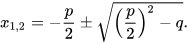  
p = -time  
q = record

In [122]:
def find_roots_optimized(p, q):
    p_half = p / 2
    D_half = (p_half**2 - q)**0.5
    x1 = -p_half + D_half
    x2 = -p_half - D_half
    if x1 > x2:
        return x2, x1
    return x1, x2
x1, x2 = find_roots_optimized(p=-total_time, q=total_distance)
x1, x2, count_integers_between(x1, x2)

(8014958.51932342, 53662612.48067658, 45647654)

In [123]:
%time
x1, x2 = find_roots_optimized(total_time, total_distance)
output = count_integers_between(x1, x2)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.15 µs


In [66]:
output

45647654

# Day 7

## Part 1
Because the journey will take a few days, she offers to teach you the game of Camel Cards. Camel Cards is sort of similar to poker except it's designed to be easier to play while riding a camel.

In Camel Cards, you get a list of hands, and your goal is to order them based on the strength of each hand. A hand consists of five cards labeled one of A, K, Q, J, T, 9, 8, 7, 6, 5, 4, 3, or 2. The relative strength of each card follows this order, where A is the highest and 2 is the lowest.

Every hand is exactly one type. From strongest to weakest, they are:

- Five of a kind, where all five cards have the same label: AAAAA
- Four of a kind, where four cards have the same label and one card has a different label: AA8AA
- Full house, where three cards have the same label, and the remaining two cards share a different label: 23332
- Three of a kind, where three cards have the same label, and the remaining two cards are each different from any other card in the hand: TTT98
- Two pair, where two cards share one label, two other cards share a second label, and the remaining card has a third label: 23432
- One pair, where two cards share one label, and the other three cards have a different label from the pair and each other: A23A4
- High card, where all cards' labels are distinct: 23456
Hands are primarily ordered based on type; for example, every full house is stronger than any three of a kind.

If two hands have the same type, a second ordering rule takes effect. Start by comparing the first card in each hand. If these cards are different, the hand with the stronger first card is considered stronger. If the first card in each hand have the same label, however, then move on to considering the second card in each hand. If they differ, the hand with the higher second card wins; otherwise, continue with the third card in each hand, then the fourth, then the fifth.

So, 33332 and 2AAAA are both four of a kind hands, but 33332 is stronger because its first card is stronger. Similarly, 77888 and 77788 are both a full house, but 77888 is stronger because its third card is stronger (and both hands have the same first and second card).

To play Camel Cards, you are given a list of hands and their corresponding bid (your puzzle input). For example:
```
32T3K 765
T55J5 684
KK677 28
KTJJT 220
QQQJA 483
```
This example shows five hands; each hand is followed by its bid amount. **Each hand wins an amount equal to its bid multiplied by its rank, where the weakest hand gets rank 1, the second-weakest hand gets rank 2, and so on up to the strongest hand. Because there are five hands in this example, the strongest hand will have rank 5 and its bid will be multiplied by 5**.

So, the first step is to put the hands in order of strength:

32T3K is the only one pair and the other hands are all a stronger type, so it gets rank 1.  
KK677 and KTJJT are both two pair. Their first cards both have the same label, but the second card of KK677 is stronger (K vs T), so KTJJT gets rank 2 and KK677 gets rank 3.  
T55J5 and QQQJA are both three of a kind. QQQJA has a stronger first card, so it gets rank 5 and T55J5 gets rank 4.  
Now, you can determine the total winnings of this set of hands by adding up the result of multiplying each hand's bid with its rank (765 * 1 + 220 * 2 + 28 * 3 + 684 * 4 + 483 * 5). So the total winnings in this example are 6440.  

Find the rank of every hand in your set. What are the total winnings?

In [1]:
file_path = '../data/day7.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

In [16]:
cards_priority = ('A', 'K', 'Q', 'J', 'T', '9', '8', '7', '6', '5', '4', '3', '2')

In [17]:
def compare_pair_of_cards(card1, card2, cards_priority):
    # 1 - 1st if higher, 0 - continue
    i1 = cards_priority.index(card1)
    i2 = cards_priority.index(card2)
    if i1 < i2:
        return 1
    elif i1 == i2:
        return 0
    else:
        return -1
    
compare_pair_of_cards('A', 'Q', cards_priority)

1

In [18]:
compare_pair_of_cards('9', 'Q', cards_priority)

-1

In [36]:
from collections import Counter
def extract_combination(hand):
    counter = Counter(hand)
    pair_of_three = False
    pair_of_twoo = False
    for value, count in counter.most_common():  # ordered desc
        # print(value, count)
        if count == 5:
            return 6
        elif count == 4:
            return 5
        elif count == 3:
            pair_of_three = True
        elif count == 2:
            if pair_of_three:
                return 4
            if pair_of_twoo:
                return 2
            pair_of_twoo = True
    if pair_of_three:
        return 3
    if pair_of_twoo:
        return 1
    return 0

for hand in ['AAAAA', 'AAAA1', '1AAAA', 'AAQQQ', '11133', '11123', '21113', '11223', 'AATT4', '11345', 'A3T3K', '23456']:
    print(hand, extract_combination(hand))

AAAAA 6
AAAA1 5
1AAAA 5
AAQQQ 4
11133 4
11123 3
21113 3
11223 2
AATT4 2
11345 1
A3T3K 1
23456 0


In [46]:
def _compare_hands(hand1, hand2, cards_priority):
    comb1 = extract_combination(hand1)
    comb2 = extract_combination(hand2)
    if comb1 > comb2:
        return 1
    elif comb1 < comb2:
        return -1
    else:
        for c1, c2 in zip(hand1, hand2):
            res = compare_pair_of_cards(c1, c2, cards_priority)
            if res != 0:
                return res
        return res
    
def compare_hands(hand1, hand2):
    return _compare_hands(hand1, hand2, cards_priority)
    
compare_hands('32T3K', 'T55J5')

-1

In [47]:
compare_hands('T55J5', '32T3K')

1

In [48]:
compare_hands('T55J5', 'T55J5')

0

In [49]:
from functools import cmp_to_key

sorted(['32T3K', 'T55J5', 'KK677', 'KTJJT', 'QQQJA'], key=cmp_to_key(compare_hands))

['32T3K', 'KTJJT', 'KK677', 'T55J5', 'QQQJA']

In [50]:
hands = []
bids = []
for l in lines:
    hand, bid = l.split(' ')
    hands.append(hand)
    bids.append(int(bid))

In [55]:
def compare_wrapper(pair1, pair2):
    return compare_hands(pair1[0], pair2[0])

combined = sorted(zip(hands, bids), key=cmp_to_key(compare_wrapper))

In [59]:
sorted_hands, sorted_bids = zip(*combined)

In [63]:
sum([i*bid for i, bid in enumerate(sorted_bids, 1)])

248812215

## Part 2
To make things a little more interesting, the Elf introduces one additional rule. Now, J cards are jokers - wildcards that can act like whatever card would make the hand the strongest type possible.

To balance this, J cards are now the weakest individual cards, weaker even than 2. The other cards stay in the same order: A, K, Q, T, 9, 8, 7, 6, 5, 4, 3, 2, J.

J cards can pretend to be whatever card is best for the purpose of determining hand type; for example, QJJQ2 is now considered four of a kind. However, for the purpose of breaking ties between two hands of the same type, J is always treated as J, not the card it's pretending to be: JKKK2 is weaker than QQQQ2 because J is weaker than Q.

Now, the above example goes very differently:
```
32T3K 765
T55J5 684
KK677 28
KTJJT 220
QQQJA 483
```
32T3K is still the only one pair; it doesn't contain any jokers, so its strength doesn't increase.
KK677 is now the only two pair, making it the second-weakest hand.
T55J5, KTJJT, and QQQJA are now all four of a kind! T55J5 gets rank 3, QQQJA gets rank 4, and KTJJT gets rank 5.
With the new joker rule, the total winnings in this example are 5905.

Using the new joker rule, find the rank of every hand in your set. What are the new total winnings?

In [84]:
cards_priority = ('A', 'K', 'Q', 'T', '9', '8', '7', '6', '5', '4', '3', '2', 'J')

from collections import Counter
def extract_combination(hand):
    counter = Counter(hand)
    pair_of_three = False
    pair_of_twoo = False

    most_common_items = counter.most_common()
    j_bonus = 0
    for i, (k, v) in enumerate(most_common_items):
        if k == 'J':
            j_bonus = v
            most_common_items.pop(i)

    if j_bonus:
        if most_common_items:
            char, count = most_common_items[0]
            most_common_items[0] = (char, count + j_bonus)
        else:
            return 6  # there was JJJJJ
        
    for value, count in most_common_items:  # ordered desc
        # print(value, count)
        if count == 5:
            return 6
        elif count == 4:
            return 5
        elif count == 3:
            pair_of_three = True
        elif count == 2:
            if pair_of_three:
                return 4
            if pair_of_twoo:
                return 2
            pair_of_twoo = True
    if pair_of_three:
        return 3
    if pair_of_twoo:
        return 1
    return 0

In [85]:
extract_combination('JJJJJ')

6

In [86]:
sorted(['32T3K', 'T55J5', 'KK677', 'KTJJT', 'QQQJA'], key=cmp_to_key(compare_hands))

['32T3K', 'KK677', 'T55J5', 'QQQJA', 'KTJJT']

In [87]:
combined = sorted(zip(hands, bids), key=cmp_to_key(compare_wrapper))
sorted_hands, sorted_bids = zip(*combined)
sum([i*bid for i, bid in enumerate(sorted_bids, 1)])

250057090

# Day 8

## Part 1

In [90]:
file_path = '../data/day8.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

lines

['LLRLRLLRRLRLRLLRRLRRRLRRRLRRLRRLRLRLRRRLLRLRRLRLRRRLRLLRRLRLRLLRRRLLRLRRRLRLRRLRRLRLLRRLRRLRLRLRLLRLLRRLRRLRRLRRLRRLRLLRLRLRRRLRRRLRRLRLRLRRLRRRLRLRRRLRLRLRLRRRLRRLRRLRRRLLLLRRLRRLRLRRRLRLRRRLRRLLLLRLRLRRRLRRRLRLRRLLRLRLRRRLRLRLRRRLRLLRRRLRRLRLRLRRRLRLLRRLLRRRLRRRLRRRLRRLRLRLRRRLRRRLRRRLLRRRR',
 '',
 'NNN = (TNT, XDJ)',
 'GKJ = (TQD, PDP)',
 'VPC = (TST, FDJ)',
 'MNG = (GQS, RVK)',
 'JQF = (LLK, BQH)',
 'HPS = (XDJ, TNT)',
 'VSD = (GNK, HJS)',
 'VGT = (KXR, FMP)',
 'GQB = (GTX, HLC)',
 'PLJ = (QCS, TVN)',
 'BXM = (GMB, LBC)',
 'XJQ = (NHG, NQD)',
 'NKX = (KBJ, GTS)',
 'PKT = (XFK, SKR)',
 'HJB = (LRX, KQG)',
 'SNM = (PLN, CJT)',
 'LQD = (MTK, KMS)',
 'KTN = (SSC, KPL)',
 'LVJ = (CQJ, GPP)',
 'GSV = (SNM, JKK)',
 'CPH = (DCQ, FCP)',
 'TDV = (JFD, HKH)',
 'SBS = (NFC, CGC)',
 'DBG = (GST, LGH)',
 'LHS = (GHG, TRD)',
 'BPP = (DLF, NJT)',
 'TNT = (VNX, PTR)',
 'VTN = (XHM, NMQ)',
 'BRD = (KLF, HXJ)',
 'TJT = (BVD, PFN)',
 'GNK = (NMT, LLX)',
 'DVH = (GQS, RVK)',
 'KRJ = (QSP, TTQ)',
 'KQ

In [101]:
instructions = lines[0]
mapping = {l.split(' = ')[0]: l.split(' = ')[1][1:-1].split(', ') for l in lines[2:]}

In [106]:
instructions

'LLRLRLLRRLRLRLLRRLRRRLRRRLRRLRRLRLRLRRRLLRLRRLRLRRRLRLLRRLRLRLLRRRLLRLRRRLRLRRLRRLRLLRRLRRLRLRLRLLRLLRRLRRLRRLRRLRRLRLLRLRLRRRLRRRLRRLRLRLRRLRRRLRLRRRLRLRLRLRRRLRRLRRLRRRLLLLRRLRRLRLRRRLRLRRRLRRLLLLRLRLRRRLRRRLRLRRLLRLRLRRRLRLRLRRRLRLLRRRLRRLRLRLRRRLRLLRRLLRRRLRRRLRRRLRRLRLRLRRRLRRRLRRRLLRRRR'

In [108]:
current_stage = 'AAA'
total_steps = 0
to_break = False
while True:
    for side in instructions:
        if side == 'L':
            current_stage = mapping[current_stage][0]
        else:
            current_stage = mapping[current_stage][1]
        total_steps += 1

        if current_stage == 'ZZZ':
            to_break = True
            break

    if to_break:
        break

In [109]:
total_steps

23147

## Part 2

We need sth like Least common multiple. It would be quite easy if it happened only at the end of the secuence. But this may happen anytime in the middle. To count LCM for each instruction step? The least is the first. A small boost may be achieved by removing the found beams from the loop.

There should be some way to optimize paths and probably skip some sequences of steps. This may be achievable as we iterate over a small sequence of maps for millions of times

In [135]:
from collections import defaultdict
from tqdm.notebook import tqdm
tqdm.pandas()

In [206]:
current_stages = [k for k in mapping if k[-1] == 'A']
total_steps = 0
to_break = False
instructions_lcm = defaultdict(lambda: {i: [] for i, stage in enumerate(current_stages)})

for iter in tqdm(range(1, 100)):
    for instr_idx, side in enumerate(instructions):
        if side == 'L':
            current_stages = [mapping[current_stage][0] for current_stage in current_stages]
        else:
            current_stages = [mapping[current_stage][1] for current_stage in current_stages]
        total_steps += 1

        for i, current_stage in enumerate(current_stages):
            if current_stage[-1] == 'Z':
                instructions_lcm[instr_idx][i].append(iter)
                if all(l for l in list(instructions_lcm[instr_idx].values())):
                    to_break = True
                    break
        
        if to_break:
            break
    
    if to_break:
            break

  0%|          | 0/99 [00:00<?, ?it/s]

In [209]:
from pprint import pprint

for key, inner_dict in instructions_lcm.items():
    non_empty_lists = [lst for lst in inner_dict.values() if lst]
    if len(non_empty_lists) == len(current_stages):
        pprint(f"Key {key} has non-empty lists: {inner_dict}")

('Key 292 has non-empty lists: {0: [67], 1: [47], 2: [73], 3: [59], 4: [79], '
 '5: [71]}')


all of them are prime

In [210]:
lcm = 1
for k, v in instructions_lcm[292].items():
    print(k, v)
    lcm *= v[0]

0 [67]
1 [47]
2 [73]
3 [59]
4 [79]
5 [71]


In [211]:
lcm*len(instructions)

22289513667691

In [2]:
# I stopped my fist attempt after 75 mins with the result of 7445485538
expected_mins = 22289513667691 * 75 / 7445485538
expected_hours = expected_mins / 60
expected_days = expected_hours / 24
expected_days

155.92162045943385

# Day 9

## Part 1

In [1]:
file_path = '../data/day9.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]

lines

['12 23 42 82 168 344 680 1276 2260 3777 5966 8922 12640 16938 21356 25028 26524 23659 13266 -9070 -49320',
 '15 34 71 134 240 423 740 1277 2160 3570 5754 9047 14050 22517 40542 87994 223135 601424 1607163 4133978 10159334',
 '15 39 81 147 248 422 771 1513 3049 6045 11529 21003 36570 61076 98267 152961 231235 340627 490353 691539 957468',
 '6 11 39 100 210 397 707 1227 2161 4026 8085 17220 37600 81773 174330 362339 734970 1461479 2866653 5582890 10857048',
 '10 21 40 70 110 160 247 497 1286 3512 9042 21403 46799 95536 183913 336607 589690 995214 1631382 2631681 4270936',
 '27 38 57 93 169 347 778 1790 4032 8709 17982 35689 68709 129621 241968 450775 843758 1594525 3051300 5919610 11636474',
 '0 -4 -8 -12 -16 -20 -24 -28 -32 -36 -40 -44 -48 -52 -56 -60 -64 -68 -72 -76 -80',
 '1 -2 -3 16 82 231 523 1096 2290 4870 10357 21425 42223 78313 135653 217669 318919 413118 432325 232846 -458168',
 '13 12 21 69 199 471 972 1841 3324 5890 10472 18967 35283 67555 132843 266976 544707 1119752 2301727

In [8]:
def predict(l):
    
    def get_diffs(arr):
        res = []
        for i in range(1, len(arr)):
            res.append(arr[i] - arr[i-1])
        return res
    
    diffs = [int(el) for el in l.split(' ')]
    pred = 0
    while not all(el == 0 for el in diffs):
        pred += diffs[-1]
        diffs = get_diffs(diffs)
    
    return pred

predict('1 3 6 10 15 21')

28

In [9]:
s = 0
for l in lines:
    s+= predict(l)

In [10]:
s

1868368343

## Part 2

if all zeros, return the first element and add it to the above calculated first element. array passed below, one res returned above

In [24]:
def f(arr):
    res = []
    for i in range(1, len(arr)):
        res.append(arr[i] - arr[i-1])
    if all(el == 0 for el in res):
        return 0
    else:
        return res[0] - f(res)
    
f([10, 13, 16, 21, 30, 45])

5

In [26]:
def predict(l):
    l = [int(el) for el in l.split(' ')]
    pred = l[0] - f(l)
    
    return pred

predict('1 3 6 10 15')

0

In [27]:
s = 0
for l in lines:
    s+= predict(l)

In [28]:
s

1022

# Day 10

## Part 1

The pipes are arranged in a two-dimensional grid of tiles:

* | is a vertical pipe connecting north and south.
* \- is a horizontal pipe connecting east and west.
* L is a 90-degree bend connecting north and east.
* J is a 90-degree bend connecting north and west.
* 7 is a 90-degree bend connecting south and west.
* F is a 90-degree bend connecting south and east.
* . is ground; there is no pipe in this tile.
* S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.

Based on the acoustics of the animal's scurrying, you're confident the pipe that contains the animal is one large, continuous loop.

In [24]:
file_path = '../data/day10.txt'
with open(file_path, 'r') as file:
    lines = [line.strip() for line in file]


# lines = [".....",
# ".S-7.",
# ".|.|.", 
# ".L-J.", "....."]
# for l in lines:
#     print(l)

len(lines), len(lines[0])

(140, 140)

In [25]:
def chars_connect_up(ch: str, up_ch: str = None) -> bool:
    if up_ch is None:
        return False
    if ch in ['S', '|', 'L', 'J'] and up_ch in ['|', '7', 'F']:
        return True
    return False

def chars_connect_down(ch: str, down_ch: str = None) -> bool:
    if down_ch is None:
        return False
    if ch in ['S', '|', '7', 'F'] and down_ch in ['|', 'L', 'J']:
        return True
    return False

def chars_connect_right(ch: str, right_ch: str = None) -> bool:
    if right_ch is None:
        return False
    if ch in ['S', '-', 'L', 'F'] and right_ch in ['-', 'J', '7']:
        return True
    return False

def chars_connect_left(ch: str, left_ch: str = None) -> bool:
    if left_ch is None:
        return False
    if ch in ['S', '-', 'J', '7'] and left_ch in ['-', 'L', 'F']:
        return True
    return False

Recursive step. Has duration until this cell. Check which cell to go next (there max one such). If blocked or end, then return current location and path_len to it. Otherwise start a new step passing the current path_len and the next cell which connects to the current. The next cell becomes the base for the next step

In [26]:
def search(sketch, sketch_shape, current_cell, path_len, blocked_backward: str = None):
    print('Entered search on cell', current_cell)
    x, y = current_cell
    current_ch = sketch[x][y]
    print('current_ch', current_ch)

    if not blocked_backward == 'up' and x > 0:  # not top row
        up_ch = sketch[x-1][y]
        if up_ch != 'S' and chars_connect_up(current_ch, up_ch):
            print('going up')
            return search(sketch, sketch_shape, (x-1, y), path_len+1, blocked_backward='down')
    if not blocked_backward == 'down' and x < sketch_shape[0] - 1:  # not last row
        down_ch = sketch[x+1][y]
        if down_ch != 'S' and chars_connect_down(current_ch, down_ch):
            print('going down')
            return search(sketch, sketch_shape, (x+1, y), path_len+1, blocked_backward='up')
        
    if not blocked_backward == 'right' and y < sketch_shape[1] - 1:  
        right_ch = sketch[x][y+1]
        if right_ch != 'S' and chars_connect_right(current_ch, right_ch):
            print('going right')
            return search(sketch, sketch_shape, (x, y+1), path_len+1, blocked_backward='left')
    if not blocked_backward == 'left' and y > 0: 
        left_ch = sketch[x][y-1]
        if left_ch != 'S' and chars_connect_left(current_ch, left_ch):
            print('going left')
            return search(sketch, sketch_shape, (x, y-1), path_len+1, blocked_backward='right')
        
    return path_len

In [30]:
import sys
sys.getrecursionlimit()

3000

In [35]:
sys.setrecursionlimit(15000)

In [36]:
for i, l in enumerate(lines):
    if 'S' in l:
        start_pos = [i, l.index('S')]
print('start_pos', start_pos)

rows = len(lines)
cols = len(lines[0])

x, y = start_pos
search(sketch=lines, sketch_shape=(rows, cols), current_cell=start_pos, path_len=0)     

start_pos [57, 65]
Entered search on cell [57, 65]
current_ch S
going up
Entered search on cell (56, 65)
current_ch F
going right
Entered search on cell (56, 66)
current_ch J
going up
Entered search on cell (55, 66)
current_ch 7
going left
Entered search on cell (55, 65)
current_ch L
going up
Entered search on cell (54, 65)
current_ch F
going right
Entered search on cell (54, 66)
current_ch -
going right
Entered search on cell (54, 67)
current_ch J
going up
Entered search on cell (53, 67)
current_ch 7
going left
Entered search on cell (53, 66)
current_ch -
going left
Entered search on cell (53, 65)
current_ch L
going up
Entered search on cell (52, 65)
current_ch F
going right
Entered search on cell (52, 66)
current_ch -
going right
Entered search on cell (52, 67)
current_ch -
going right
Entered search on cell (52, 68)
current_ch J
going up
Entered search on cell (51, 68)
current_ch 7
going left
Entered search on cell (51, 67)
current_ch -
going left
Entered search on cell (51, 66)
cur

13901

13901 too high

3000